# Object Recognizer

---

This notebook explains CNNs through the implementation of an Object Recognizer in sklearn. <br>
<br>We train a CNN to classify images from the [CIFAR-10 database](https://www.cs.toronto.edu/~kriz/cifar.html).
- The CIFAR-10 dataset consists of 60,000 colour images of size (32x32) in 10 classes, with 6000 images per class.
- Here are the classes in the dataset, as well as 10 random images from each:
  - airplane										
  - automobile										
  - bird										
  - cat										
  - deer										
  - dog										
  - frog										
  - horse										
  - ship										
  - truck										


### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


### 2. Visualize Some Training Images

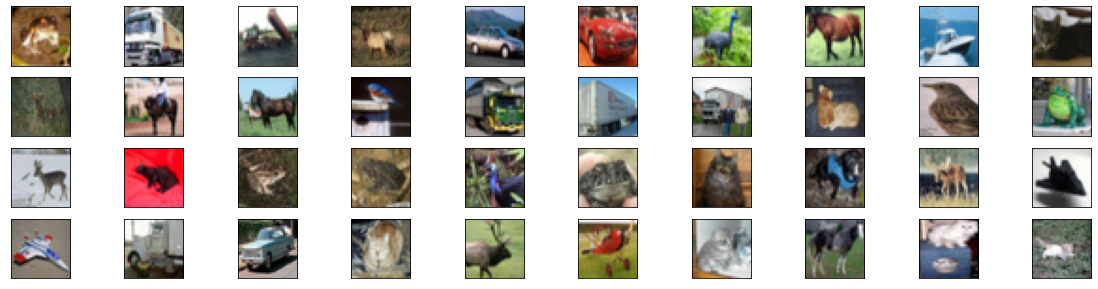

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

- Let's see how a datapoint looks like:

In [3]:
print(x_train[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


---

- Let's normalize each cell value [0,255], so that each cell value lies within the same distribution [0,1].
  - That is, the values change from [0,255] --> [0,1].
- We normalize using the formula: 
> $$ \frac{X-X_{min}}{X_{max}-X_{min}}$$
- Here, X_min=0 and X_max=255.
- Hence, 
> $$ \frac{X-X_{min}}{X_{max}-X_{min}} = \frac{X}{255}$$

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

- A datapoint in the dataset could belong to any one of the 10 classes mentioned earlier.
- Let's convert the output into one-hot encoded vector of size 10.
- This will be helpful for our CNN to recognize a given image datapoint into one of the 10 classes.

In [ ]:
from keras.utils import np_utils

# one-hot encoding 
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Data Augmentation

- Data augmentation helps in creating invariance in the data, especially in image data.
  - Invariance in data could be for:
    - Shift
    - Rotation
    - Zoom
    - Noise, etc

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

### 6. Visualize Original and Augmented Images

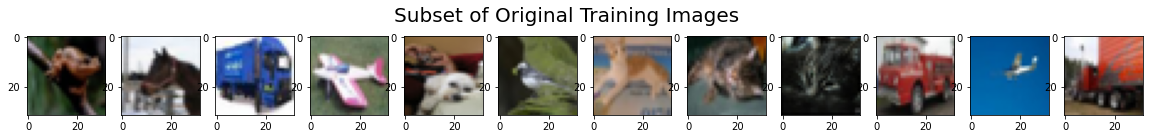

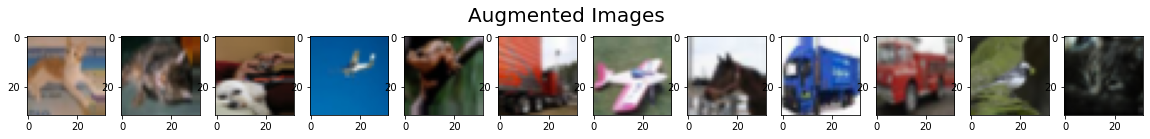

In [ ]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

### 7. Define the Model Architecture 

In [ ]:
# Necessary model parameters:
output_dim = 10
input_shape = x_train[1].shape
batch_size = 45
epochs = 100

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='glorot_uniform',
                 activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', kernel_initializer='glorot_uniform',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=2, kernel_initializer='glorot_uniform', padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)         

### 8. Compile the Model 

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', 
                  metrics=['accuracy'])

### 9. Train the Model 

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 13s - loss: 1.7657 - accuracy: 0.3482 - val_loss: 1.4900 - val_accuracy: 0.4794

Epoch 00001: val_loss improved from inf to 1.49000, saving model to model.weights.best.hdf5
Epoch 2/100
 - 7s - loss: 1.5044 - accuracy: 0.4481 - val_loss: 1.3675 - val_accuracy: 0.5136

Epoch 00002: val_loss improved from 1.49000 to 1.36752, saving model to model.weights.best.hdf5
Epoch 3/100
 - 7s - loss: 1.4143 - accuracy: 0.4844 - val_loss: 1.3113 - val_accuracy: 0.5522

Epoch 00003: val_loss improved from 1.36752 to 1.31132, saving model to model.weights.best.hdf5
Epoch 4/100
 - 7s - loss: 1.3588 - accuracy: 0.5065 - val_loss: 1.2703 - val_accuracy: 0.5502

Epoch 00004: val_loss improved from 1.31132 to 1.27028, saving model to model.weights.best.hdf5
Epoch 5/100
 - 7s - loss: 1.3162 - accuracy: 0.5235 - val_loss: 1.1526 - val_accuracy: 0.5992

Epoch 00005: val_loss improved from 1.27028 to 1.15255, saving model to model.weights.best.hdf5

---
#### Explaining each line of code to build the model:

> We start off by defininig some necessary model parameters such as:
  - input_dim: Defines the input layer size.
    - Preferred to be equal to the input datapoint size.
  - output_dim: Defines the output layer size.
    - Should to be equal to the output size.
  - batch_size: No. of datapoints taken in each batch, during the training process.
    - Why do we use batches of datapoints instead of all the datapoints at once for training?
      - Because:
        - It requires less memory.
        - Typically networks train faster with mini-batches.
          - That's because the weights update after each epoch.
  - epochs: No. of epochs(iterations over all the datapoints) for training.

> - Next, we define our model to be Sequetial().
  - An artificial neural network is a sequential model.
    - The Sequential model is a linear stack of layers.
- add() method is used to add a layer into the sequential model.

> - Conv2D creates a Convolutional layer for spatial 2d data
    - filters = no. of filters
    - kernel_size = size of each filter
    - padding:
      - 'valid': No padding 
      - 'same': Same sized zero-padding
    - Note: A colored image is a 3d-tensor of 2d-images(Red, Green, and Blue)

> - Activation function used in each layer is: ReLu
- Weights are initialized using: Glorot Uniform Distribution

> - MaxPooling2D creates a Max-Pooling layer for 2d data:
    - Helps creating location-invariance in the image data.
      - Location-invariance is used to detect the subject in an image irrespective of its location in the image.

> - Dropout is used to dropping out a few number of neurons in a layer, which results in regularising the MLP.
  - A certain number of neurons turn off at random, hence their outputs are not used in the model building.
  - Regularization is used for 'Bias-Variance Trade-offs', which refers to 'Overfitting' or 'Underfitting' a model.

> - Flatten operation flattens the multidimensional data into 1-d array.

> - 'Dense' implements the operation: output = activation(dot(input, kernel) + bias) 
  - Where:
    - activation() is the element-wise activation function passed as the activation argument,
    - kernel is a weights matrix created by the layer,
    - bias is a bias vector created by the layer (only applicable if use_bias is True).
  - output = activation(dot(input, kernel) + bias)
    - y = activation(WT. X + b)

> - Since, the CNN model built is supposed to recognise the images from 10 classes mentioned earlier, which is basically a 10-class classification task:
  - Hence, we use Softmax activation function in the output layer.

> - summary() method prints the number of weight and bias(if use_bias is True) parameters calculated in each layer.

> - compile() method configures the learning process before training a model.
  - For optimizing the gradients, Adam optimizer is used.

> - Keras models are trained on Numpy arrays of input data and labels. 

> - ModelCheckpoint is used to save the best weights yeilded by the model.

> - For training a model, we typically use the  fit() method.
  - fit() method trains the model for a fixed number of epochs (iterations on a dataset).
    - It returns a History object.
    - History attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
  - Verbose:
    - verbose=0 shows nothing (silent)
    - verbose=1 shows an animated progress bar like this:
      - progres_bar: [ ==============> ]
    - verbose=2 mentions the number of epoch like this:
      - Epoch = 1/10

> - Finally, we evaluate the model on the test data via evaluate().

---

### 10. Load the Model with the Best Validation Accuracy

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')


### 11. Evaluating the Model on Test dataset

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.734069379043579
Test accuracy: 0.7476000189781189


---

#### How to interpret loss and accuracy?

- Loss can be seen as a distance between the true values of the problem and the values predicted by the model.
  - Greater the loss is, more huge is the errors made on the data.

- Accuracy can be seen as the number of errors made on the data.

  That means :
  - a low accuracy and huge loss means:
    - the model made huge errors on a lot of data
  - a low accuracy but low loss means:
    - the model made little errors on a lot of data
  - a great accuracy with low loss means:
    - the model made low errors on a few data (best case)

---

- The function below is used to update the plots for each epoch and error.

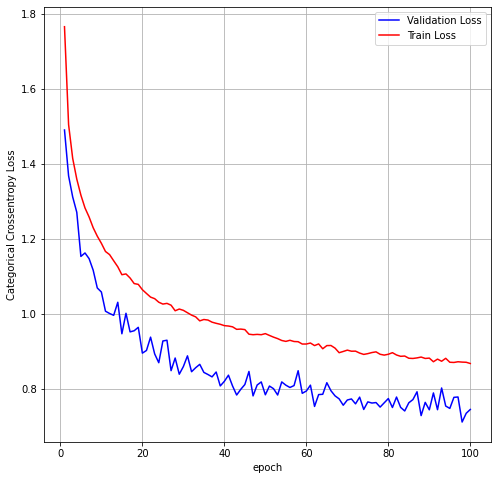

In [ ]:

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

- Confusion Matrix and Classification Report:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


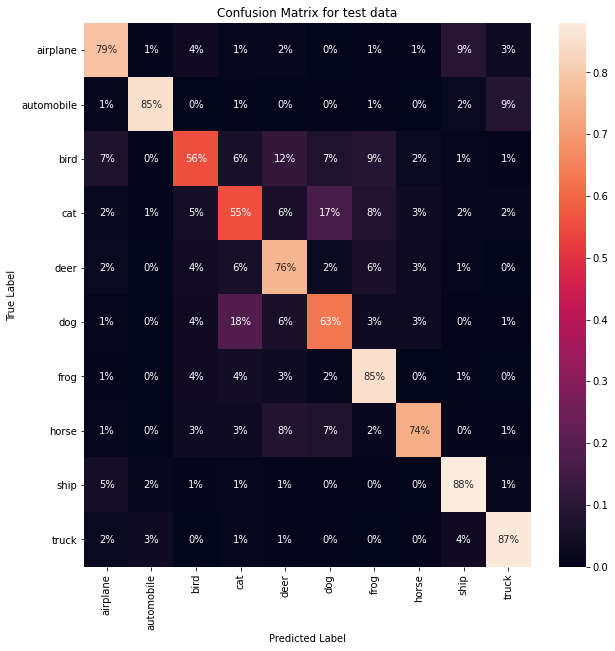



-------------------- Metric report for test data --------------------

               precision    recall  f1-score   support

    airplane       0.78      0.79      0.78      1000
  automobile       0.92      0.85      0.89      1000
        bird       0.70      0.56      0.62      1000
         cat       0.57      0.55      0.56      1000
        deer       0.66      0.76      0.70      1000
         dog       0.64      0.63      0.63      1000
        frog       0.74      0.85      0.79      1000
       horse       0.85      0.74      0.79      1000
        ship       0.81      0.88      0.84      1000
       truck       0.83      0.87      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
predic= model.predict(x_test)
predic= np.argmax(predic, axis=1)
y_test_new=np.argmax(y_test, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import metrics
import seaborn as sns

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test_new, predic)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

df = pd.DataFrame(conf_mat, index = class_names, columns = class_names)

# Plotting Confusion Matrix
plt.figure(figsize=(10,10))
sns.heatmap(df, annot=True, fmt='.0%')
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
classification_report = metrics.classification_report(y_test_new, predic, target_names=class_names)

print('\n')
print('-'*20,'Metric report for test data','-'*20)
print('\n',classification_report)

### 12. Visualize Some Predictions

This may give some insight into why the network is misclassifying certain objects.

In [ ]:
# get predictions on the test set
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

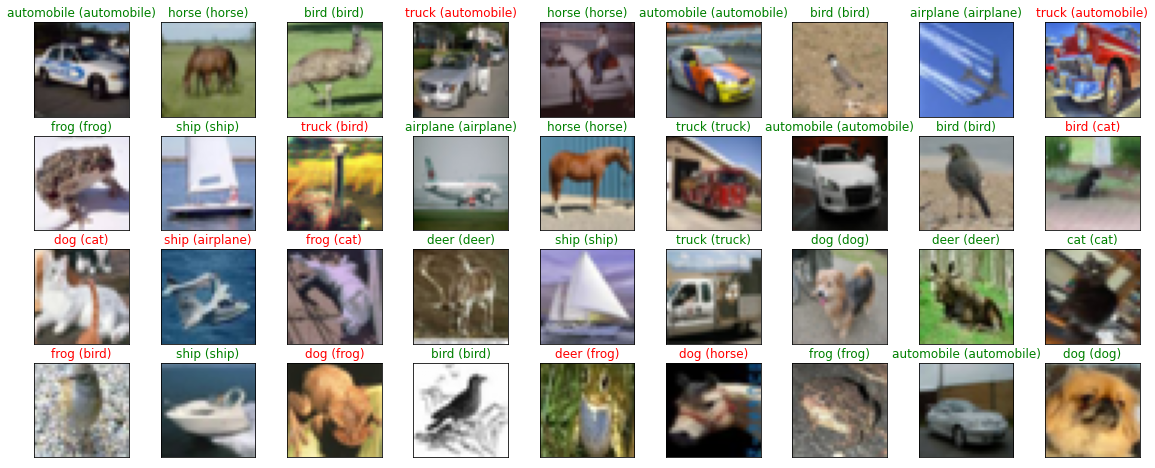

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=36, replace=False)):
    ax = fig.add_subplot(4, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))